In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm

In [2]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def meanadjust(x):
    y=np.copy(x)
    yme=np.median(y)
    ytm=y-yme
    return ytm

def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [3]:
frequency='M'
gronum=100
path1='C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\'

In [4]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
mvalue0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\marketvalue.csv'
yiziban0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\yiziban.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
mvalue=pd.read_csv(mvalue0,parse_dates=True,index_col=0)
mvalue=dadjust(mvalue)
yiziban0=pd.read_csv(yiziban0,parse_dates=True,index_col=0,encoding='gbk')
yiziban0=dadjust(yiziban0)
stfre=np.unique(stdata0.index)

In [5]:
close_file='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\收盘价.csv'
close_data0=pd.read_csv(close_file,parse_dates=True,index_col=0)
close_data=dadjust(close_data0)
close_rate=(close_data-close_data.shift(1))/close_data.shift(1)
close_rate=close_rate[2:]
open_file='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\开盘价.csv'
open_data0=pd.read_csv(open_file,parse_dates=True,index_col=0)
open_data=dadjust(open_data0)

In [6]:
ope_data=open_data[1:]

In [7]:
for i in range(len(stfre)-1):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    yzb0=yiziban0.loc[stfre[i]]
    o_data0=ope_data.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        yzb=pd.DataFrame(yzb0).T
        o_data=pd.DataFrame(o_data0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            yzb1=yzb0[len(yzb0)-1:len(yzb0)]
            yzb=yzb.append(yzb1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
            o_data1=o_data0[len(o_data0)-1:len(o_data0)]
            o_data=o_data.append(o_data1)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            o_data2=pd.DataFrame(o_data2).T
            o_data=c_data.apeend(o_data2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002) 
            yzb2=pd.DataFrame(yzb0).T
            yzb=yzb.append(yzb2)

In [8]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [9]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [10]:
errate=(o_data-o_data.shift(1))/o_data.shift(1)

In [11]:
errate[dic[i][j]].loc[fre[1-1]]

NameError: name 'dic' is not defined

In [12]:
file={}
name1=os.listdir(path1)

In [13]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],parse_dates=True,index_col=0)
    key.append(name1[i][0:-4])
    data0[key[i]]=dadjust(data[key[i]])
fre=np.unique(data0[key[len(name1)-1]].index)

In [14]:
fre=np.unique(data0[key[len(name1)-1]].index)
dic={}
group={}
n_group={}
n_dic={}

In [15]:
mc={}
for mu in range(len(key)):
    mc[key[mu]]={}

In [16]:
file

{0: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\cmvalue.csv',
 1: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\EBIT息税前利润.csv',
 2: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\marketvalue.csv',
 3: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\PB.csv',
 4: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\PCF.csv',
 5: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\PE.csv',
 6: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\PS.csv',
 7: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\净资产收益率.csv',
 8: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\周成交金额.csv',
 9: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\周振幅2.csv',
 10: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\周换手率2.csv',
 11: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\周涨幅2.csv',
 12: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\开盘价.csv',
 13: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\每股公积金.csv',
 14: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\每股收益增长率.csv',
 15: 'C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\营业利润率.csv',
 16: 'C:\\Users\\wuboyuan\\Desktop

In [159]:
fre

array(['2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
       '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05',
       '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11',
       '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05',
       '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11',
       '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
       '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
       '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
       '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
       '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', 

In [17]:
fre=fre[:-1]

In [18]:
all_index={}
nll_index={}
for i in range(len(fre)+1):
    if i ==0:
        dic[i]=0
    else:
        tradeday0=tradeday.loc[fre[i-1]]
        dindex=tradeday0[tradeday0!=0].T.dropna().index
        ust=st.loc[fre[i-1]]
        ust=ust[ust!=1]
        yzb_index=yzb.loc[fre[i-1]]
        yzb_index=yzb_index[yzb_index==0].T.index
        d_gindex=ust[dindex].dropna().index
        d_gindex=d_gindex&yzb_index
        #stand_rate=pd.DataFrame(errate1[d_gindex].loc[fre[i-1]]).sort_values(by=fre[i-1],ascending=False)
        #st_rate=stand_rate[0:3].sum().values[0]-stand_rate[-3:].sum().values[0]
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            if len(data1)<30:
                data1=data0[key[mu]].loc[fre[i-1]].iloc[-1]
            data1=data1[d_gindex]
            #mvalue1=mvalue.loc[fre[i-1]]
            #mvalue1=mvalue1[d_gindex]
            data1=data1.dropna().astype(float)
            #mvalue1=mvalue1.dropna().astype(float)
            #c_index=data1.index & mvalue1.index
            #data1=data1[c_index]
            #mvalue1=mvalue1[c_index]
            #mvalue1=pd.DataFrame(mvalue1).apply(medianpeak).sort_values(by=fre[i-1],ascending=False)
            data1=pd.DataFrame(data1).apply(medianpeak)#.sort_values(by=fre[i-1],ascending=False)
            #l_data=np.arange(len(data1)+1)[1:]
            #mvalue1.T.values[0]=l_data/(len(l_data)+1)
            #data1.T.values[0]=l_data/(len(l_data)+1)
            #mvalue1= mvalue1.apply(norm.ppf)
            #data1=data1.apply(norm.ppf)
            #mvalue1=mvalue1.loc[data1.index]
            #mvalue1=sm.add_constant(mvalue1)
            #model = sm.OLS(data1,mvalue1)
            #results = model.fit()
            #d_data=results.resid
            sdata=pd.DataFrame(data1).apply(nondimensionalize).sort_values(by=fre[i-1],ascending=True)
            l=len(sdata)
            for j in range(int(gronum)):
                group[j]=sdata[round(((j)/int(gronum))*l):round(((j+1)/int(gronum))*l)].index
            dic[i]=copy.deepcopy(group)
            dicrate={}
            for j in range(int(gronum)):
                    dicrate[j]=errate[dic[i][j]].loc[fre[i-1]].mean()
            gpdv=pd.DataFrame(dicrate,index=dicrate.keys())[0:1].T
            mc[key[mu]][i]=gpdv[-10:].sum().values[0]

In [19]:
for mu in range(len(key)):
    if mu==0:
        w_gt0=pd.DataFrame(list(mc[key[mu]].values()),index=mc[key[mu]].keys())
        w_gt0[key[mu]]=w_gt0.values
        w_gt=copy.deepcopy(w_gt0[key[mu]])
    else:
        w_gt0=pd.DataFrame(list(mc[key[mu]].values()),index=mc[key[mu]].keys())
        w_gt0[key[mu]]=w_gt0.values
        w_gt0=copy.deepcopy(w_gt0[key[mu]])
        w_gt=pd.concat([w_gt, w_gt0],axis=1,join='inner')

In [20]:
w_gtx=copy.deepcopy(w_gt)
#w_gtx=w_gtx.rolling(center=False,window=2).mean().shift(1)+w_gtx*2/3

In [171]:
w_gtx

,cmvalue,marketvalue,周成交金额,周换手率2,周涨幅2,开盘价,每股收益增长率,营业收入增长率
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.857319,-0.943895,-0.302792,0.340257,0.906949,-0.381905,-0.337668,-0.414832
3,0.396561,0.407182,1.256225,1.794749,1.860747,0.560740,0.712954,0.760877
4,0.201586,0.297955,0.764068,1.297511,1.546938,0.185261,0.456520,0.547811
5,-0.617270,-0.801563,-0.173160,0.349728,-0.209990,0.090432,-0.532999,-0.945275
6,-0.620047,-0.764902,-0.199031,0.034439,-0.039736,-0.174175,-0.955910,-0.631349
7,-1.092261,-0.985196,-0.839400,-0.693212,-0.329796,-1.269520,-1.158110,-1.100524
8,1.673300,1.521214,1.930036,2.138494,2.275087,1.520988,1.809361,1.783368
9,0.521648,0.373359,1.356783,1.594311,2.226696,1.250934,0.808755,0.887087
10,0.231313,0.118727,0.828422,1.000267,1.256537,0.607792,0.117068,-0.081311


In [21]:
gronum1=100
n_group={}
n_dic={}
for i in range(len(fre)+1):
    if i>1:
        tradeday0=tradeday.loc[fre[i-1]]
        dindex=tradeday0[tradeday0!=0].T.dropna().index
        ust=st.loc[fre[i-1]]
        ust=ust[ust!=1]
        yzb_index=yzb.loc[fre[i-1]]
        yzb_index=yzb_index[yzb_index==0].T.index
        d_gindex=ust[dindex].dropna().index
        d_gindex=d_gindex&yzb_index
        oindex=w_gtx[i-1:i].T.abs().sort_values(by=i,ascending=False)[3:].index
        wegh=w_gtx[i-1:i]
        wegh.values[0]=1
        #wegh.iloc[0][oindex]=0
        for k in range(len(key)):
            data1=data0[key[k]].loc[fre[i-1]]
            if len(data1)<30:
                data1=data0[key[k]].loc[fre[i-1]].iloc[-1]
            u_index=data1.T.index&d_gindex
            #c_mvalue1=mvalue[u_index].loc[fre[i-1]]
            #c_mvalue1=pd.DataFrame(c_mvalue1).apply(medianpeak).apply(nondimensionalize).sort_values(by=fre[i-1],ascending=False)
            #cl_data=np.arange(len(c_mvalue1)+1)[1:]
            #c_mvalue1.T.values[0]=cl_data/(len(cl_data)+1)
            #c_mvalue1=c_mvalue1.apply(norm.ppf)
            #c_mvalue1=sm.add_constant(c_mvalue1)
            c_data=pd.DataFrame(data1[u_index])#.apply(medianpeak).apply(nondimensionalize)#.sort_values(by=fre[i-1],ascending=False)
            #c_data.T.values[0]=cl_data/(len(cl_data)+1)
            #c_data=c_data.apply(norm.ppf)
            #c_mvalue1=c_mvalue1.loc[c_data.index]
            #model = sm.OLS(c_data,c_mvalue1)
            #results = model.fit()
            #c_data=results.resid
            #c_data=pd.DataFrame(c_data).apply(nondimensionalize).sort_values(by=0,ascending=True)
            if wegh[key[k]].values[0]>0:
                c_data=c_data.rank(ascending=False)*wegh[key[k]].abs().values[0]
            else:
                c_data=c_data.rank(ascending=False)*wegh[key[k]].abs().values[0]
            if k==0:
                n_data=copy.deepcopy(c_data)
            else:
                n_data=n_data+c_data
        n_data=n_data.dropna().sort_values(by=fre[i-1],ascending=True)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)

In [22]:
n_mrate=np.zeros(len(range(2,len(fre)-1)))
n_dicrate={}
n_grorate=np.zeros(int(gronum1))
for j in range(int(gronum1)):
    for i in range(2,len(fre)-1):
        n_mrate[i-2]=errate[n_dic[i][j]].loc[fre[i+1]].mean()
    n_dicrate[j]= copy.deepcopy(n_mrate)
for k in n_dicrate:
    n_grorate[k]=n_dicrate[k].mean()

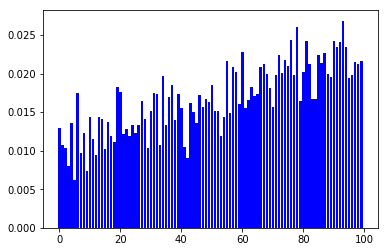

In [23]:
#plt.figure(13)
num=np.arange(len(n_grorate))
plt.bar(num,n_grorate, color = 'b')
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\单调性.png'
#plt.savefig(photo1)
plt.show()

In [24]:
unitnet0=n_dicrate[99]
unitnet=unitnet0.cumsum()
unitnet=unitnet+1
w_rate=w_rate500.cumsum()+1

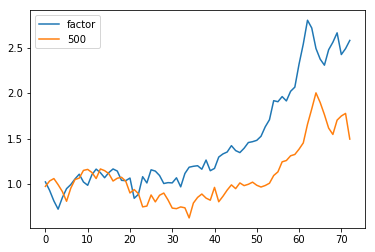

In [25]:
plt.figure(11)
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\净值.png'
#plt.savefig(photo1)

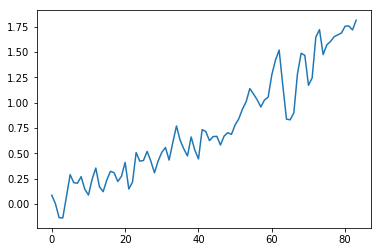

In [198]:
plt.figure(12)
plt.plot(unitnet-w_rate.T.values[0][0:len(unitnet)])
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\超额净值.png'
#plt.savefig(photo1)

In [199]:
stand=(stand500-stand500.shift(1))/stand500.shift(1)
for i in range(1,len(fre)):
    stand_data=stand.loc[fre[i]]
    if len(stand_data)>1:
        s_net=stand_data+1
        s_net=s_net.cumprod()
    else:
        s_net=pd.DataFrame(stand_data).T+1
    if i==1:
        stand_net=s_net
    else:
        s_net=s_net-1+stand_net.iloc[-1].values[0]
        stand_net= stand_net.append(s_net)

In [200]:
close_file='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\收盘价.csv'
close_data0=pd.read_csv(close_file,parse_dates=True,index_col=0)
close_data=dadjust(close_data0)
close_rate=(close_data-close_data.shift(1))/close_data.shift(1)
close_rate=close_rate[2:]
open_file='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\开盘价.csv'
open_data0=pd.read_csv(open_file,parse_dates=True,index_col=0)
open_data=dadjust(open_data0)

In [201]:
hs300_file='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\hs300.csv'
hs300_data0=pd.read_csv(hs300_file,parse_dates=True,index_col=0,encoding='gbk')
#hs300_data=dadjust(hs300_data0)
#hs300_rate=(close_data-close_data.shift(1))/close_data.shift(1)
#close_rate=close_rate[2:]
sz_file='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\sz.csv'
sz_data0=pd.read_csv(sz_file,parse_dates=True,index_col=0,encoding='gbk')
#sz_data=dadjust(sz_data0)
zxb_file='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\zxb.csv'
zxb_data0=pd.read_csv(zxb_file,parse_dates=True,index_col=0,encoding='gbk')
#zxb_data=dadjust(zxb_data0)

In [202]:
hs300=hs300_data0['收盘']
sz=sz_data0['收盘']
zxb=zxb_data0['收盘']

In [203]:
indexu=10
hs300_10=hs300.rolling(center=False,window=indexu).mean()
sz_10=sz.rolling(center=False,window=indexu).mean()
zxb_10=zxb.rolling(center=False,window=indexu).mean()

In [204]:
indexu=20
hs300_20=hs300.rolling(center=False,window=indexu).mean()
sz_20=sz.rolling(center=False,window=indexu).mean()
zxb_20=zxb.rolling(center=False,window=indexu).mean()

In [205]:
qty1=1
qty2=0.5
qty3=0.75
qty4=0

In [206]:
hs10=hs300-hs300_10
hs20=hs300-hs300_20
hsquty=copy.deepcopy(pd.DataFrame(hs300))
hsindex1=hs20[hs20>0].index&hs10[hs10>0].index
hsquty.loc[hsindex1]=qty1
hsindex2=hs20[hs20<0].index&hs10[hs10>0].index
hsquty.loc[hsindex2]=qty2
hsindex3=hs20[hs20>0].index&hs10[hs10<0].index
hsquty.loc[hsindex3]=qty3
hsindex4=hs20[hs20<0].index&hs10[hs10<0].index
hsquty.loc[hsindex4]=qty4

In [207]:
sz10=sz-sz_10
sz20=sz-sz_20
szquty=copy.deepcopy(pd.DataFrame(sz))
szindex1=sz20[sz20>0].index&sz10[sz10>0].index
szquty.loc[szindex1]=qty1
szindex2=sz20[sz20<0].index&sz10[sz10>0].index
szquty.loc[szindex2]=qty2
szindex3=sz20[sz20>0].index&sz10[sz10<0].index
szquty.loc[szindex3]=qty3
szindex4=sz20[sz20<0].index&sz10[sz10<0].index
szquty.loc[szindex4]=qty4

In [208]:
zxb10=zxb-zxb_10
zxb20=zxb-zxb_20
zxbquty=copy.deepcopy(pd.DataFrame(zxb))
zxbindex1=zxb20[zxb20>0].index&zxb10[zxb10>0].index
zxbquty.loc[zxbindex1]=qty1
zxbindex2=zxb20[zxb20<0].index&zxb10[zxb10>0].index
zxbquty.loc[zxbindex2]=qty2
zxbindex3=zxb20[zxb20>0].index&zxb10[zxb10<0].index
zxbquty.loc[zxbindex3]=qty3
zxbindex4=zxb20[zxb20<0].index&zxb10[zxb10<0].index
zxbquty.loc[zxbindex4]=qty4

In [209]:
all_equty=zxbquty+szquty+hsquty
all_equty=all_equty.dropna()[20:]/3
all_equty=dadjust(all_equty)

In [226]:
len(close_data[n_dic[i][99]].loc[fre[i+1]])

23

In [244]:
ma=20
mu=20
all_net=np.ones(2)
for i in range(2,len(fre)-1):
    ic_data0=close_data[n_dic[i][99]].loc[fre[i-1]]
    ic_data=close_data[n_dic[i][99]].loc[fre[i]]
    io_data=open_data[n_dic[i][99]].loc[fre[i]]
    io_data2=close_data[n_dic[i][99]].loc[fre[i+1]]
    if len(ic_data0)>30:
        ic_data0=pd.DataFrame(ic_data0).T
    if len(io_data2)>30:
        io_data2=pd.DataFrame(io_data2).T
    if len(all_net)<30:##
        if len(io_data)<30:
            i_net=(ic_data-ic_data.shift(1))/ic_data.shift(1)
            i_net.iloc[0]=((ic_data-io_data)/io_data).iloc[0]
            #i_net.iloc[0]=((ic_data.iloc[0]-ic_data0.iloc[-1])/ic_data0.iloc[-1])#.iloc[0]
            friday=copy.deepcopy(i_net)
            i_net.iloc[-1]=((io_data2.iloc[0]-ic_data.iloc[-2])/ic_data.iloc[-2])
            i_net=i_net.T.mean()+1
            friday=friday.T.mean()+1
            friday=friday.cumprod()
            friday=pd.DataFrame(friday)
            i_net=i_net.cumprod()
            i_net=pd.DataFrame(i_net)
            uz=copy.deepcopy(i_net)
        else:
            i_net0=((io_data2.iloc[0]-io_data)/io_data).mean()+1
            i_net=pd.DataFrame(pd.DataFrame(io_data).mean())
            i_net.values[0]=i_net0
            uz=copy.deepcopy(i_net)
    else:
        if len(io_data)<30:
            i_net=(ic_data-ic_data.shift(1))/ic_data.shift(1)
            i_net.iloc[0]=((ic_data-io_data)/io_data).iloc[0]
            #i_net.iloc[0]=((ic_data.iloc[0]-ic_data0.iloc[-1])/ic_data0.iloc[-1])
            friday=copy.deepcopy(i_net)
            i_net.iloc[-1]=((io_data2.iloc[0]-ic_data.iloc[-2])/ic_data.iloc[-2])
            i_net=i_net.T.mean()+1
            friday=friday.T.mean()+1
            friday=friday.cumprod()
            friday=pd.DataFrame(friday)
            i_net=i_net.cumprod()
            i_net=pd.DataFrame(i_net)
            uz=copy.deepcopy(i_net)
        else:
            i_net0=((io_data2.iloc[0]-io_data)/io_data).mean()+1
            friday0=((ic_data-io_data)/io_data).mean()+1
            friday=pd.DataFrame(pd.DataFrame(io_data).mean())
            friday.values[0]=friday0
            i_net=pd.DataFrame(pd.DataFrame(io_data).mean())
            i_net.values[0]=i_net0
            uz=copy.deepcopy(i_net)
        avrge_10=non_net.rolling(center=False,window=ma).mean().iloc[-1].values[0]
        bench=non_net.iloc[-1].values[0]
        if bench>avrge_10:
            if len(io_data)<30:
                ii_net=(ic_data-ic_data.shift(1))/ic_data.shift(1)##
                ii_net.iloc[0]=((ic_data-io_data)/io_data).iloc[0]##
                #ii_net.iloc[0]=((ic_data.iloc[0]-ic_data0.iloc[-1])/ic_data0.iloc[-1])##
                #ii_net.iloc[-1]=((io_data2.iloc[0]-ic_data.iloc[-2])/ic_data.iloc[-2])##
                ii_net=ii_net.T.mean()+1##
                f_net=copy.deepcopy(ii_net)##
                f_net=pd.DataFrame(f_net)
                ##i_net=i_net.cumprod()
                ##i_net=pd.DataFrame(i_net)
                #uz=copy.deepcopy(i_net)
                in_net=i_net-1+all_net.iloc[len(all_net)-1].values[0]
                in_uz=uz-1+non_net.iloc[len(non_net)-1].values[0]
                in_non_net=non_net.append(in_uz)
                in_all_net=all_net.append(in_net)
                in_bench=in_non_net
                in_avrge=in_non_net.rolling(center=False,window=mu).mean()
                extra=pd.DataFrame(in_bench.iloc[-len(uz):-1].T.values[0]-in_avrge.iloc[-len(uz):-1].T.values[0],index=in_bench.iloc[-len(uz):-1].index)
                extra=pd.DataFrame(extra.T.values[0])
                i_net=copy.deepcopy(f_net.cumprod())
                if len(extra[extra<0].dropna().index)>0:
                    in_index=extra[extra<0].dropna().index[0]
                    #i_net.iloc[in_index:].T.values[0]=np.ones(len(i_net.iloc[in_index:]))*i_net.iloc[in_index].values[0]
                    f_net.iloc[in_index+1:].T.values[0]=np.ones(len(f_net.iloc[in_index+1:]))*(((io_data.iloc[in_index+1]-ic_data.iloc[in_index])/ic_data.iloc[in_index]).mean()+1)
                    f_net[:in_index+2]=f_net.iloc[:in_index+2].cumprod()
                    f_net.iloc[in_index+1:].T.values[0]=np.ones(len(f_net.iloc[in_index+1:]))*f_net.iloc[in_index+1].values[0]
                    i_net=copy.deepcopy(f_net)
            else:
                i_net0=((io_data2.iloc[0]-io_data)/io_data).mean()+1
                i_net=pd.DataFrame(pd.DataFrame(io_data).mean())
                i_net.values[0]=i_net0
                #uz=copy.deepcopy(i_net)
        else:
            if len(io_data)<30:
                i_net=(ic_data-ic_data.shift(1))/ic_data.shift(1)
                i_net.iloc[0]=((ic_data-io_data)/io_data).iloc[0]
                i_net=i_net.T.mean()+1
                i_net=i_net.cumprod()
                i_net=pd.DataFrame(i_net)
                #uz=copy.deepcopy(i_net)
            else:
                i_net0=((io_data2.iloc[0]-io_data)/io_data).mean()+1
                i_net=pd.DataFrame(pd.DataFrame(io_data).mean())
                i_net.values[0]=i_net0
                #uz=copy.deepcopy(i_net)
            i_net.T.values[0]=np.ones(len(i_net))
        if len(all_equty.loc[fre[i-1]])<2:
            equty=all_equty.loc[fre[i-1]].values[0]
        else:
            equty=all_equty.loc[fre[i-1]].iloc[-1].values[0]
        i_net=((i_net-1)*equty)+1
        
    if i==2:
        all_net=i_net
        non_net=uz
    else:
        
        i_net=i_net-1+all_net.iloc[len(all_net)-1].values[0]
        uz=uz-1+non_net.iloc[len(non_net)-1].values[0]
        #friday=friday-1+non_net.iloc[len(non_net)-1].values[0]
        #signal=non_net.append(friday) 
        #avrge_10=signal.rolling(center=False,window=ma).mean().iloc[-1].values[0]
        #bench=signal.iloc[-1].values[0]
        all_net=all_net.append(i_net)
        non_net=non_net.append(uz)  

In [245]:
end = np.argmax((np.maximum.accumulate(all_net.T.values[0]) - all_net.T.values[0]))
start = np.argmax(all_net.T.values[0][:end])
maxdro=all_net.T.values[0][start]-all_net.T.values[0][end]
end1 = np.argmax((np.maximum.accumulate(non_net.T.values[0]) - non_net.T.values[0]))
start1 = np.argmax(non_net.T.values[0][:end1])
maxdro1=non_net.T.values[0][start1]-non_net.T.values[0][end1]
mp=[end,start]
mp1=[end1,start1]

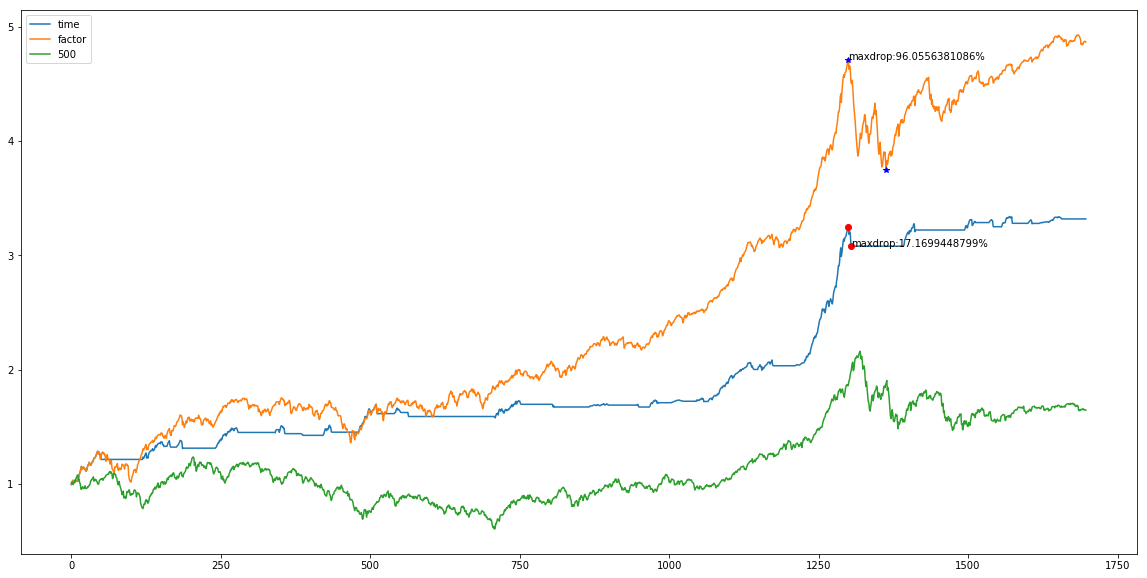

In [246]:
%matplotlib inline
plt.figure(figsize=(20,10)) 
plt.plot(all_net.T.values[0],label='time')
plt.plot(non_net.T.values[0],label='factor')
plt.plot(mp,all_net.T.values[0][mp],'o',color='r')
plt.plot(mp1,non_net.T.values[0][mp1],'*',color='b')
plt.text(end,all_net.T.values[0][end],'maxdrop:'+str(maxdro*100)+'%')
plt.text(start1,non_net.T.values[0][start1],'maxdrop:'+str(maxdro1*100)+'%')
plt.plot(stand_net.T.values[0][0:len(all_net.T.values[0])],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

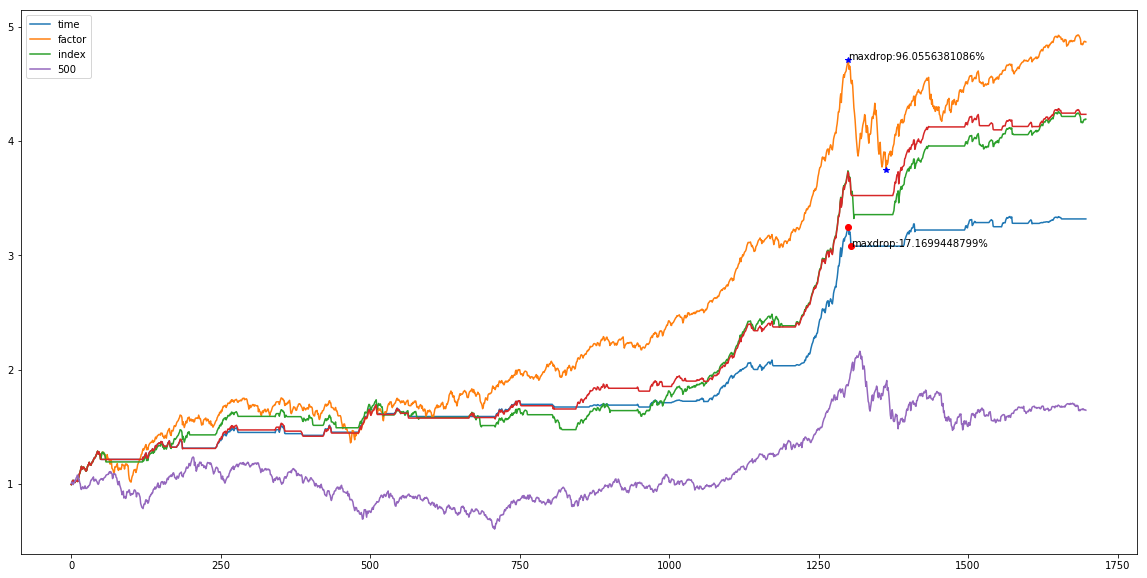

In [247]:
%matplotlib inline
plt.figure(figsize=(20,10)) 
plt.plot(all_net.T.values[0],label='time')
plt.plot(non_net.T.values[0],label='factor')
plt.plot(ux,label='index')
plt.plot(mx)
plt.plot(mp,all_net.T.values[0][mp],'o',color='r')
plt.plot(mp1,non_net.T.values[0][mp1],'*',color='b')
plt.text(end,all_net.T.values[0][end],'maxdrop:'+str(maxdro*100)+'%')
plt.text(start1,non_net.T.values[0][start1],'maxdrop:'+str(maxdro1*100)+'%')
plt.plot(stand_net.T.values[0][0:len(all_net.T.values[0])],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

In [239]:
ux=all_net.T.values[0]

In [243]:
mx=all_net.T.values[0]